In [4]:
import numpy as np
import random
import gudhi as gd
import scipy
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from scipy.sparse import coo_matrix

import sys
sys.path.append('code')
import dmtsignal as dmt
import dmtvisual as dmtvis
import importlib

dmt = importlib.reload(dmt)
dmtvis = importlib.reload(dmtvis)

## Creating a toy simplicial complex

9 points


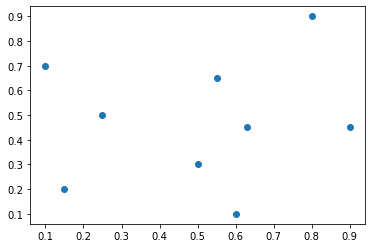

In [2]:
points=np.array([[0.15,0.2],[0.6,0.1],[0.5,0.3],[0.25,0.5],[0.63,0.45],[0.9,0.45],[0.1,0.7],[0.55,0.65],[0.8,0.9]])
n_points = points.shape[0]
print(f'{n_points} points')
plt.scatter(*points.T);

In [3]:
st=gd.SimplexTree()
st.insert([0,1,2])
st.insert([0,2,3])
st.insert([0,3,6])
st.insert([1,2,4])
st.insert([1,4,5])
st.insert([3,6,7])
st.insert([6,7,8])
st.insert([4,5,7])
st.insert([5,7,8])
X=dmt.extract_simplices(st)
kX=dmt.build_boundaries(X)

NameError: name 'dmt' is not defined

## Energy and eigenvectors for given collapses

In [496]:
##Given Collapse
collapses=[[[0, 1], [0, 1, 2]], [[0, 2], [0, 2, 3]]]

In [490]:
dim_collapses=[1]*len(collapses)
all_psi,all_phi, all_boundaries, all_complexes,all_xq=dmt.sequence_collpases(X,kX,collapses,dim_collapses)

In [491]:
energy,Mat=dmt.energy_sequence(all_psi,all_phi)

In [492]:
## Restricting M to 1-cells
a=len(X[dim_collapses[0]-1])
b=a+len(X[dim_collapses[0]])
M=Mat.toarray()[a:b,a:b]
print(M.shape[0]==len(X[1]))

True


### Compute energy flow and plot its eigenvectors

In [318]:
##energy flow
energy_flow=M@M.T


In [319]:
val,vec=np.linalg.eigh(energy_flow)
#vec,val,v=np.linalg.svd(M) ##same but with SVD

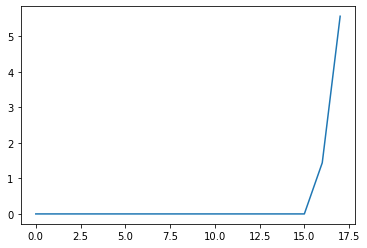

In [320]:
## PLot eigenvalues
plt.plot(val)
plt.show()

Eigenvalue 7.889992985568081e-33


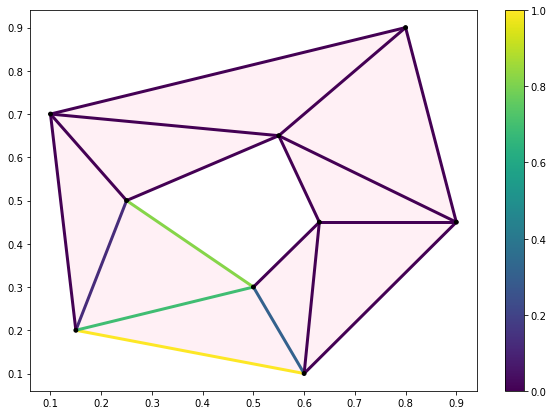

Eigenvalue 2.6471800573780422e-36


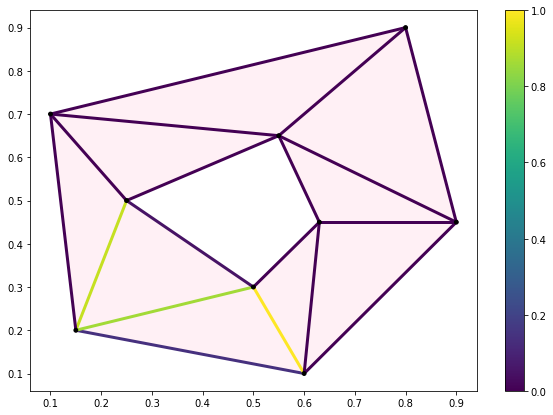

Eigenvalue 1.131959884853334e-68


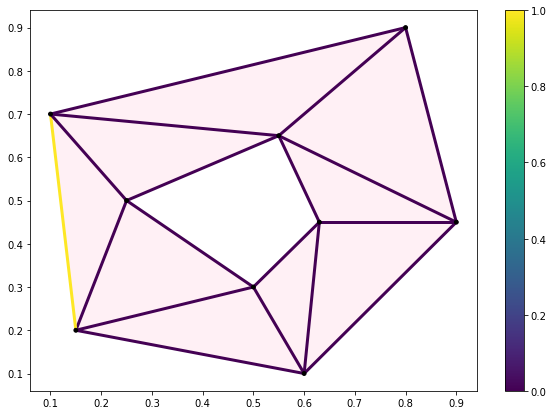

Eigenvalue 0.0


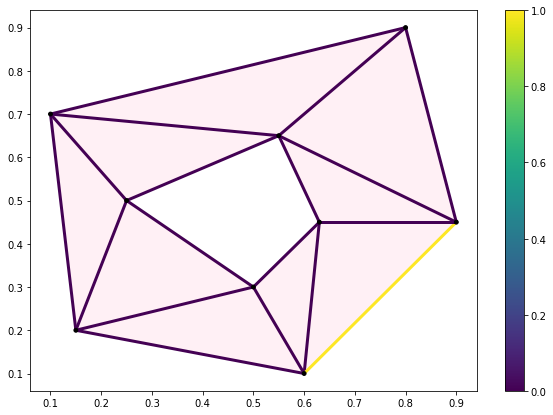

Eigenvalue 0.0


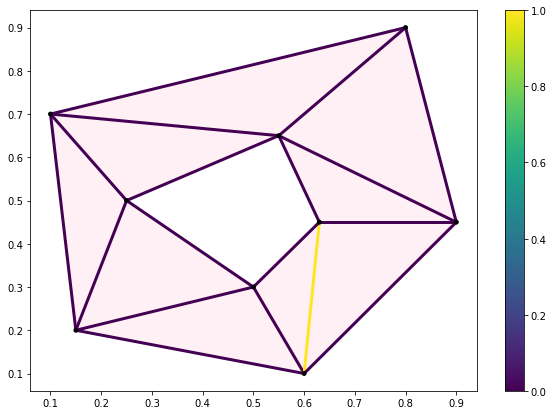

Eigenvalue 0.0


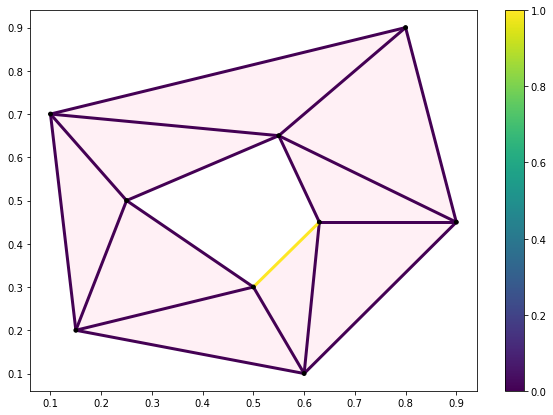

Eigenvalue 0.0


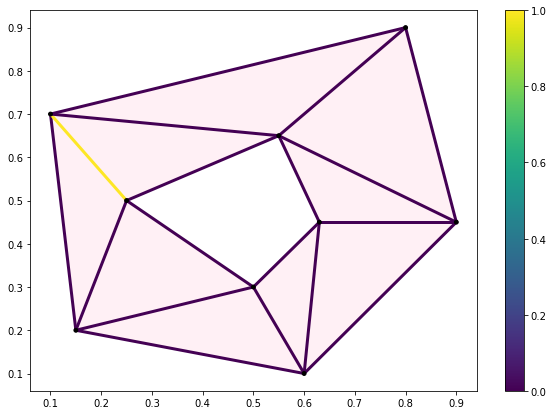

Eigenvalue 0.0


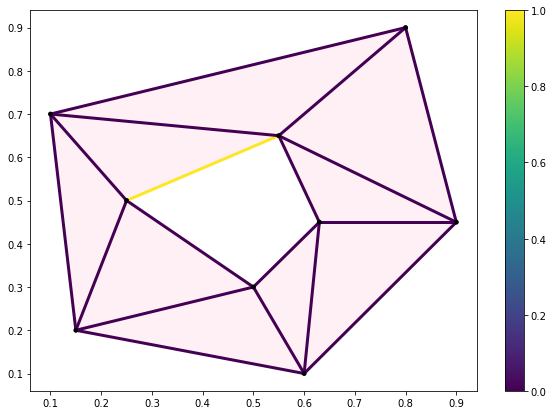

Eigenvalue 0.0


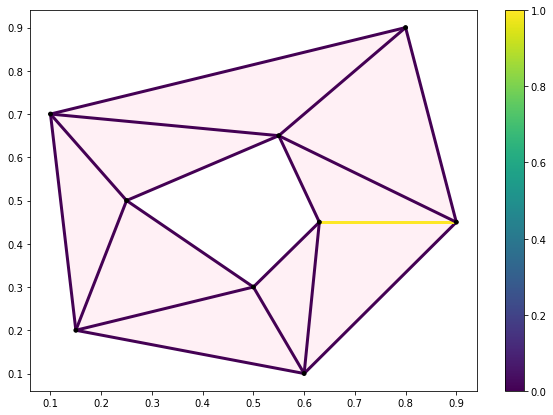

Eigenvalue 0.0


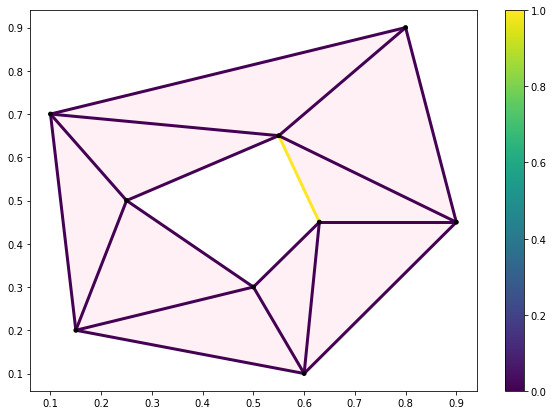

Eigenvalue 0.0


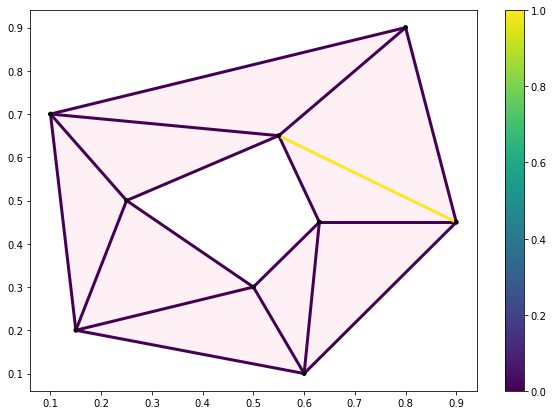

Eigenvalue 0.0


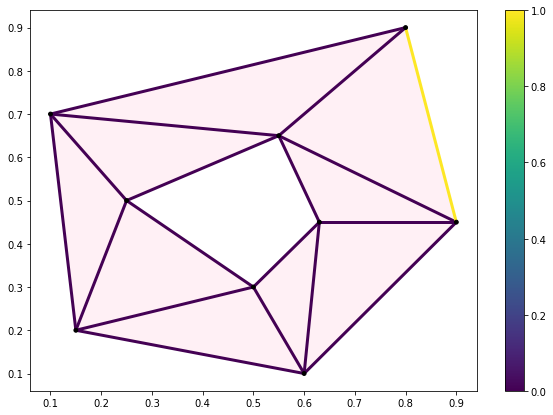

Eigenvalue 0.0


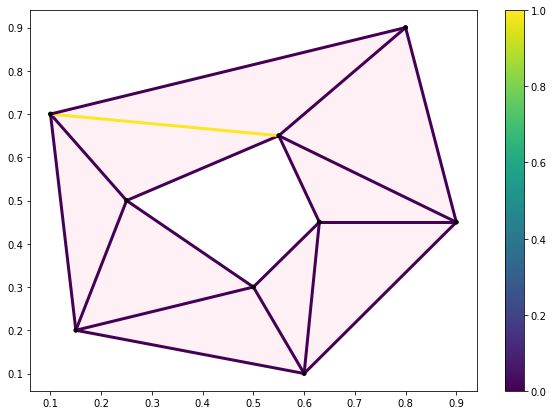

Eigenvalue 0.0


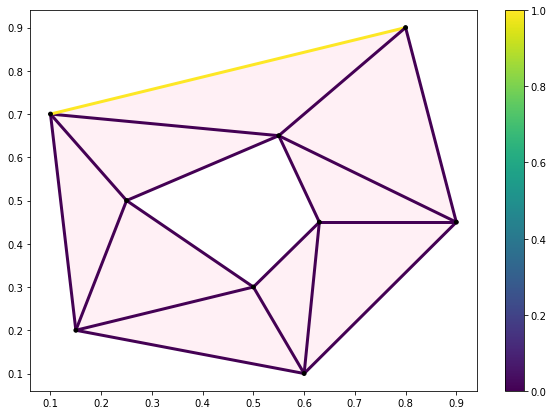

Eigenvalue 0.0


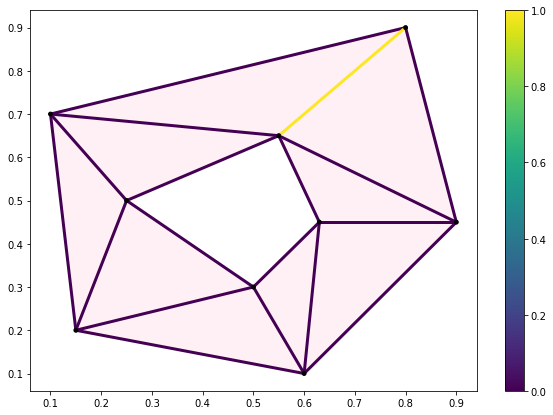

Eigenvalue 1.452847209088672e-33


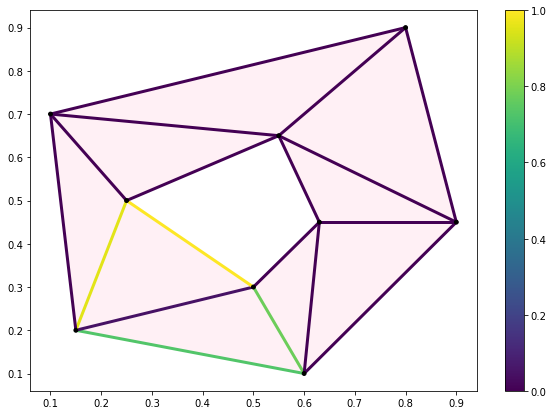

Eigenvalue 0.11495168390767725


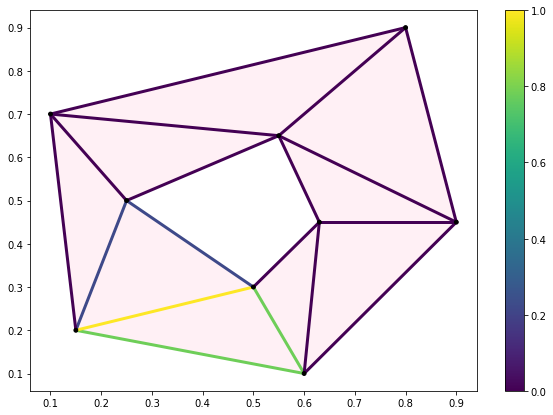

Eigenvalue 1.718381649425658


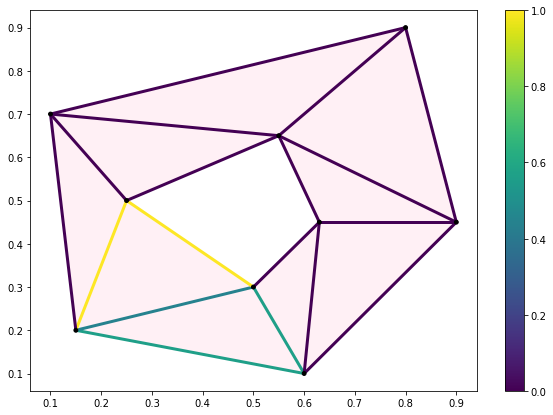

In [321]:
## Plot eigenvectors of heighest eigenvalue
for j in range(len(val)):
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111)
    color_tri='lavenderblush'
    s0=s0 = ['black']*len(X[0])
    dmtvis.plot_nodes(s0, points,ax, zorder=3,s=15)
    dmtvis.plot_edges(np.abs(vec[:,j].copy()),points,X, ax, zorder=2,linewidths=3)
    dmtvis.plot_triangles_plain(color_tri,points,X, ax, zorder=1)
    plt.colorbar(ax.collections[1], ax=ax)
    print('Eigenvalue', val[j]**2/(len(X[1])))
    plt.show()

In [323]:
vec[:,-2]

array([ 0.51312024, -0.6571923 ,  0.14407206,  0.        ,  0.51312024,
        0.        ,  0.        , -0.14407206,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

## Building flow V

In [497]:
kX=dmt.build_boundaries(X)

In [592]:
def flow_V(kX,dimq,collapses):
    idx1=[]
    idx2=[]
    for c in collapses:
        idx2.append(X[dimq+1][frozenset(c[1])])
        idx1.append(X[dimq][frozenset(c[0])])
    d=(np.array(idx2),np.array(idx1))
    d_inv=(np.array(idx1),np.array(idx2))
    
    
    values=-1/kX[dimq].toarray()[d_inv]
    print(values)
    V= coo_matrix((values, d),dtype=np.float32,shape=(len(X[dimq+1]), len(X[dimq])))
    return(V)

def poly(F,len_collapses):
    F=F.toarray()
    s=0
    for j in np.arange(1,len_collapses+1):
        s+= scipy.special.binom(len_collapses, j) *np.linalg.matrix_power(F, j)
    return(s)


In [564]:
dimq=1
V=flow_V(kX,dimq,collapses)
F=kX[1]@V
V=flow_V(kX,dimq,collapses)
reconst=poly(F,2)

(array([0, 1]), array([0, 1]))


From Forman we have
$F=1+V_{q-1}\delta_q+\delta_{q+1}V_q$

In our case $V_{q-1}=0$. We wanna see that

$$F^2-1=\binom{q}{k}(\delta_{q+1}V_q)^k=-(1-\Phi\Psi) $$


In [566]:
##here we want reconst==M 
np.sum(reconst+M)

0.0

### Bigger example

150 points


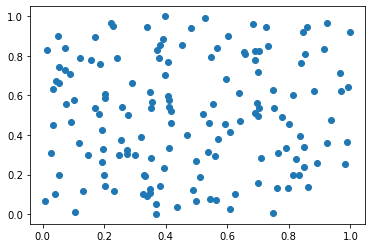

In [569]:
n_points = 150  # Approximate.
dim = 2
rs = np.random.RandomState(2882)
points = np.concatenate([
    [0.2, 1] * rs.uniform(size=(n_points//4, dim)),
    [0.2, 0.8] + [0.6, 0.2] * rs.uniform(size=(n_points//6, dim)),
    [0.2, 0] + [0.6, 0.2] * rs.uniform(size=(n_points//6, dim)),
    [0.8, 0] + [0.2, 1] * rs.uniform(size=(n_points//4, dim)),
    [0.4, 0.4] + [0.2, 0.2] * rs.uniform(size=(n_points//6, dim))
])

points = np.random.uniform(size=(n_points, dim))
#points = pg.graphs.Grid2d(10).coords

n_points = points.shape[0]
print(f'{n_points} points')

plt.scatter(*points.T);


In [572]:
ac = gd.AlphaComplex(points)
st = ac.create_simplex_tree()

before = st.num_simplices()
_ = st.prune_above_filtration(1e-2)
print(f'filtration: {before} => {st.num_simplices()} simplices')

assert st.num_vertices() == n_points
assert st.dimension() == dim

X=dmt.extract_simplices(st)
kX=dmt.build_boundaries(X)

filtration: 871 => 810 simplices


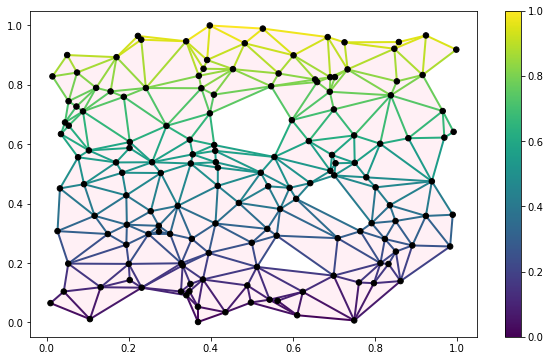

In [573]:
s0 = ['black']*len(X[0])#np.zeros(len(simplices[0]))
s1 = np.random.uniform(size=len(X[1]))
s2 =np.random.uniform(size=len(X[2]))

s1=dmtvis.height_function(X,points)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
dmtvis.plot_nodes(s0, points,ax, zorder=3,s=30)
dmtvis.plot_edges_normed(s1.copy(),points,X, ax, zorder=2,linewidths=2)
dmtvis.plot_triangles_plain('lavenderblush',points,X, ax, zorder=1)

plt.colorbar(ax.collections[0], ax=ax)

In [596]:
all_X,collapses,all_losses,total_loss,all_signals,phispsis= dmt.sequence_optimal_up_collapses(X=X,kX=kX,dimq=1,signal=s1,steps=15,random=True)
colX=all_X[-1]
colS=all_signals[-1]

In [597]:
dim_collapses=[1]*len(collapses)
all_psi,all_phi, all_boundaries, all_complexes,all_xq=dmt.sequence_collpases(X,kX,collapses,dim_collapses)
energy,Mat=dmt.energy_sequence(all_psi,all_phi)
## Restricting M to 1-cells
a=len(X[dim_collapses[0]-1])
b=a+len(X[dim_collapses[0]])
M=Mat.toarray()[a:b,a:b]
print(M.shape[0]==len(X[1]))

True


In [598]:
collapses

[[[24, 120], [24, 120, 86]],
 [[64, 123], [64, 137, 123]],
 [[44, 31], [83, 44, 31]],
 [[0, 22], [0, 69, 22]],
 [[146, 115], [115, 146, 19]],
 [[22, 143], [22, 54, 143]],
 [[110, 62], [17, 110, 62]],
 [[89, 114], [89, 114, 102]],
 [[92, 85], [65, 92, 85]],
 [[67, 13], [0, 67, 13]],
 [[88, 89], [88, 89, 114]],
 [[8, 118], [8, 117, 118]],
 [[3, 139], [11, 3, 139]],
 [[106, 93], [106, 20, 93]],
 [[64, 140], [64, 140, 4]]]

In [600]:
dimq=1
V=flow_V(kX,dimq,collapses)
F=kX[1]@V
V=flow_V(kX,dimq,collapses)


[ 1. -1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1. -1. -1.]
[ 1. -1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1. -1. -1.]


In [601]:
reconst=poly(F,100)

In [602]:
##here we want reconst==M 
np.sum(reconst+M)

7.892823654020843e+23